In [153]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [86]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [88]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [91]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,6,0,3,male,NaN,0,0,8.4583,Q,Mr
17,18,1,2,male,NaN,0,0,13.0000,S,Mr
19,20,1,3,female,NaN,0,0,7.2250,C,Mrs
26,27,0,3,male,NaN,0,0,7.2250,C,Mr
28,29,1,3,female,NaN,0,0,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292,C,Mr
863,864,0,3,female,NaN,8,2,69.5500,S,Miss
868,869,0,3,male,NaN,0,0,9.5000,S,Mr
878,879,0,3,male,NaN,0,0,7.8958,S,Mr


In [92]:
df['Age'] = df['Age'].fillna(30)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [94]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
df['Embarked'] = df['Embarked'].fillna('S')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [97]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [98]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [99]:
df['Pclass'] = df['Pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,Lower Class,male,22.0,1,0,7.2500,S,Mr
1,2,1,Upper Class,female,38.0,1,0,71.2833,C,Mrs
2,3,1,Lower Class,female,26.0,0,0,7.9250,S,Miss
3,4,1,Upper Class,female,35.0,1,0,53.1000,S,Mrs
4,5,0,Lower Class,male,35.0,0,0,8.0500,S,Mr


In [100]:
df['Sex'] = df['Sex'].str.title()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,Lower Class,Male,22.0,1,0,7.2500,S,Mr
1,2,1,Upper Class,Female,38.0,1,0,71.2833,C,Mrs
2,3,1,Lower Class,Female,26.0,0,0,7.9250,S,Miss
3,4,1,Upper Class,Female,35.0,1,0,53.1000,S,Mrs
4,5,0,Lower Class,Male,35.0,0,0,8.0500,S,Mr


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [102]:
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg, France', 'Q': 'Queenstown, Ireland', 'S': 'Southampton, England'})

In [103]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,Lower Class,Male,22.0,1,0,7.2500,"Southampton, England",Mr
1,2,1,Upper Class,Female,38.0,1,0,71.2833,"Cherbourg, France",Mrs
2,3,1,Lower Class,Female,26.0,0,0,7.9250,"Southampton, England",Miss
3,4,1,Upper Class,Female,35.0,1,0,53.1000,"Southampton, England",Mrs
4,5,0,Lower Class,Male,35.0,0,0,8.0500,"Southampton, England",Mr


In [ ]:
df_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Embarked', 'Title']], prefix='', prefix_sep='', drop_first=True)

In [113]:
df = df.drop(columns=['Pclass', 'Sex', 'Embarked', 'Title'])

In [116]:
df = pd.concat([df, df_dummies], axis=1)

In [118]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Middle Class,Upper Class,Male,"Queenstown, Ireland",...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [120]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [128]:
X = df.iloc[:, 2:11]
X.head()

,Age,SibSp,Parch,Fare,Middle Class,Upper Class,Male,"Queenstown, Ireland","Southampton, England"
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train.head()

,Age,SibSp,Parch,Fare,Middle Class,Upper Class,Male,"Queenstown, Ireland","Southampton, England"
331,45.5,0,0,28.5000,0,1,1,0,1
733,23.0,0,0,13.0000,1,0,1,0,1
382,32.0,0,0,7.9250,0,0,1,0,1
704,26.0,1,0,7.8542,0,0,1,0,1
813,6.0,4,2,31.2750,0,0,0,0,1


In [132]:
X_train.shape

(712, 9)

In [133]:
X_test.shape

(179, 9)

In [135]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [136]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [138]:
std = StandardScaler()

In [139]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [140]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [144]:
knn.score(X_train_std, y_train)

0.8651685393258427

In [145]:
knn.score(X_test_std, y_test)

0.8212290502793296

In [151]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
knn_confusion

array([[413,  31],
       [ 65, 203]], dtype=int64)

[Text(0.5, 15.0, 'Predicted Survived'),
 Text(83.40000000000006, 0.5, 'Actual Survive'),
 Text(0.5, 1.0, 'KNN Confusion Matrix')]

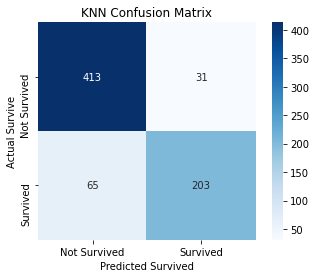

In [150]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
sns.heatmap(
    knn_confusion,
    cmap='Blues',
    annot=True,
    fmt='g',
    square=True,
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
).set(
    xlabel='Predicted Survived',
    ylabel='Actual Survive',
    title='KNN Confusion Matrix'
)

In [152]:
(413+203)/(413+31+65+203)

0.8651685393258427

[Text(0.5, 15.0, 'Predicted Survived'),
 Text(83.40000000000006, 0.5, 'Actual Survive'),
 Text(0.5, 1.0, 'KNN Confusion Matrix')]

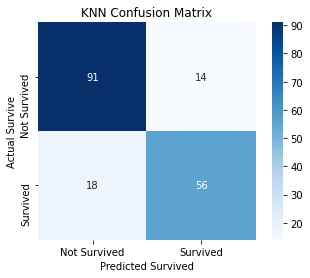

In [161]:
knn_confusion_test = confusion_matrix(y_test, knn.predict(X_test_std))
sns.heatmap(
    knn_confusion_test,
    cmap='Blues',
    annot=True,
    fmt='g',
    square=True,
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
).set(
    xlabel='Predicted Survived',
    ylabel='Actual Survive',
    title='KNN Confusion Matrix'
)

In [174]:
parameters = {
    "n_neighbors": range(1, 100),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_std, y_train)
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
best_parameters = {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [176]:
knn.score(X_train_std, y_train)

0.827247191011236

In [177]:
knn.score(X_test_std, y_test)

0.8268156424581006

[Text(0.5, 15.0, 'Predicted Survived'),
 Text(83.40000000000006, 0.5, 'Actual Survive'),
 Text(0.5, 1.0, 'KNN Confusion Matrix')]

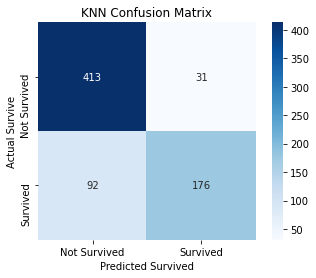

In [178]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
sns.heatmap(
    knn_confusion,
    cmap='Blues',
    annot=True,
    fmt='g',
    square=True,
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
).set(
    xlabel='Predicted Survived',
    ylabel='Actual Survive',
    title='KNN Confusion Matrix'
)

[Text(0.5, 15.0, 'Predicted Survived'),
 Text(83.40000000000006, 0.5, 'Actual Survive'),
 Text(0.5, 1.0, 'KNN Confusion Matrix')]

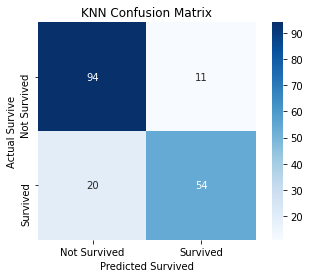

In [179]:
knn_confusion_test = confusion_matrix(y_test, knn.predict(X_test_std))
sns.heatmap(
    knn_confusion_test,
    cmap='Blues',
    annot=True,
    fmt='g',
    square=True,
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
).set(
    xlabel='Predicted Survived',
    ylabel='Actual Survive',
    title='KNN Confusion Matrix'
)

In [204]:
test = pd.read_csv('data/test.csv')

In [205]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
def data_prepocessing(df):
    df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0]
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
    df['Age'] = df['Age'].fillna(30)
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Pclass'] = df['Pclass'].map({1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'})
    df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg, France', 'Q': 'Queenstown, Ireland', 'S': 'Southampton, England'})
    df_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Embarked', 'Title']], prefix='', prefix_sep='', drop_first=True)
    df = df.drop(columns=['Pclass', 'Sex', 'Embarked', 'Title'])
    df = pd.concat([df, df_dummies], axis=1)

    return df

In [207]:
test = data_prepocessing(test).iloc[:, :10]

In [208]:
test

,PassengerId,Age,SibSp,Parch,Fare,Middle Class,Upper Class,male,"Queenstown, Ireland","Southampton, England"
0,892,34.5,0,0,7.8292,0,0,1,1,0
1,893,47.0,1,0,7.0000,0,0,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,30.0,0,0,8.0500,0,0,1,0,1
414,1306,39.0,0,0,108.9000,0,1,0,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1
416,1308,30.0,0,0,8.0500,0,0,1,0,1


In [209]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           418 non-null    int64  
 1   Age                   418 non-null    float64
 2   SibSp                 418 non-null    int64  
 3   Parch                 418 non-null    int64  
 4   Fare                  417 non-null    float64
 5   Middle Class          418 non-null    uint8  
 6   Upper Class           418 non-null    uint8  
 7   male                  418 non-null    uint8  
 8   Queenstown, Ireland   418 non-null    uint8  
 9   Southampton, England  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [210]:
test[test.isna().any(axis=1)]

,PassengerId,Age,SibSp,Parch,Fare,Middle Class,Upper Class,male,"Queenstown, Ireland","Southampton, England"
152,1044,60.5,0,0,NaN,0,0,1,0,1


In [211]:
test['Fare'] = test['Fare'].fillna(32)

In [212]:
pID = test['PassengerId']

In [213]:
data = test.drop(columns='PassengerId')
data.head()

,Age,SibSp,Parch,Fare,Middle Class,Upper Class,male,"Queenstown, Ireland","Southampton, England"
0,34.5,0,0,7.8292,0,0,1,1,0
1,47.0,1,0,7.0000,0,0,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,0,1,0,1
4,22.0,1,1,12.2875,0,0,0,0,1


In [214]:
data_std = std.transform(data)
data_std

array([[ 0.37751016, -0.47072241, -0.47934164, ...,  0.7243102 ,
         3.29646275, -1.68779402],
       [ 1.34003313,  0.37992316, -0.47934164, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [ 2.4950607 , -0.47072241, -0.47934164, ...,  0.7243102 ,
         3.29646275, -1.68779402],
       ...,
       [ 0.68551751, -0.47072241, -0.47934164, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 0.03100189, -0.47072241, -0.47934164, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 0.03100189,  0.37992316,  0.78470001, ...,  0.7243102 ,
        -0.30335547, -1.68779402]])

In [216]:
survived = knn.predict(data_std)

In [218]:
final = pd.DataFrame({
    'PassangerId': pID,
    'Survived': survived
})

In [220]:
final.to_csv('data/data_submission_knn.csv', index=False)